# **2-1) Adaline**

In [51]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

## **a)**

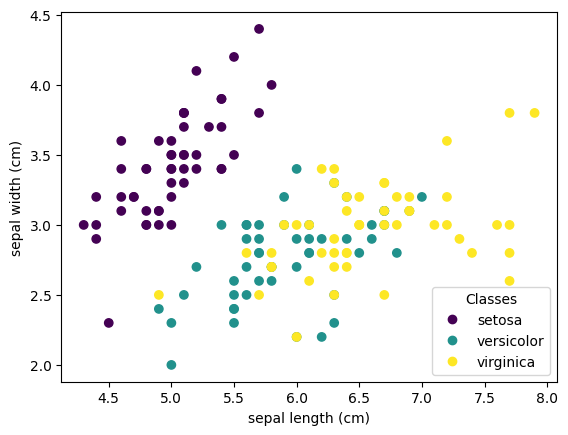

In [52]:
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [53]:
class adaline ():

    def __init__ (self, learning_rate=0.001, epochs=50):
        self.lr = learning_rate
        self.iters = epochs

    def fit (self, X, y):

        self.ws = np.zeros (1 + X.shape[1])
        self.cost = []

        for i in range (self.iters):
            z = np.dot(X, self.ws[1:]) + self.ws[0]
            errors = (y - z)

            self.ws[1:] += self.lr * X.T.dot(errors)
            self.ws[0] += self.lr * errors.sum()

            self.cost.append((errors ** 2).sum() / 2.0)

        return self
    
    def predict (self, X):

        return np.where((np.dot(X, self.ws[1:]) + self.ws[0]) >= 0, 1, -1)

In [54]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):


    markers = ('s', 'x', 'o', '^', 'v')
    colors = ( 'cyan','green', 'gray', 'red', 'blue')
    cmap = ListedColormap(colors[ : len(np.unique(y))+1])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx],label = cl)

In [55]:
x_train = np.column_stack((iris.data[:, 0], iris.data[:, 1]))
y_train = np.concatenate(((np.zeros((iris.target==0).sum())+1).astype(int), (np.zeros(len((iris.target))-(iris.target==0).sum())-1).astype(int)), axis=0)

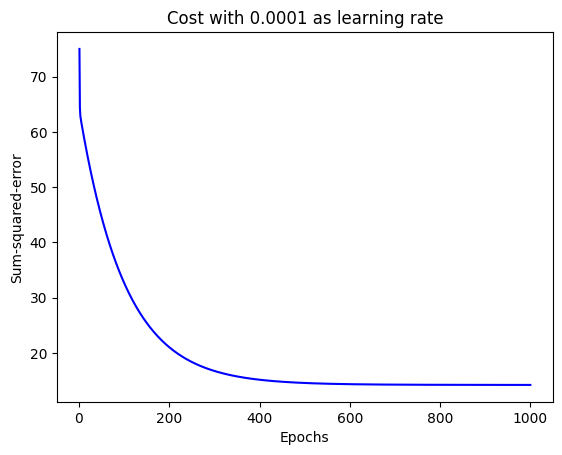

In [56]:
ad = adaline (learning_rate=0.0001, epochs=1000)
ad.fit(x_train, y_train)

plt.plot(range(1, len(ad.cost) + 1), ad.cost, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Cost with 0.0001 as learning rate')
plt.show()

In [57]:
pd.DataFrame(data = ad.ws)

,0
0,0.186366
1,-0.713826
2,1.193198


C:\Users\Asus\AppData\Local\Temp\ipykernel_8636\3061406648.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx],label = cl)


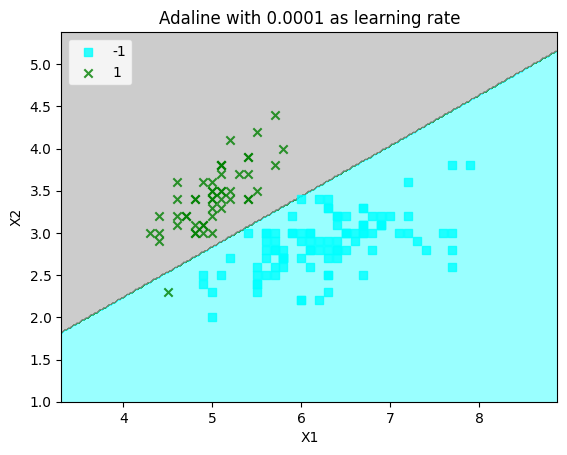

In [58]:
plot_decision_regions(x_train, y_train, classifier = ad)
plt.title('Adaline with 0.0001 as learning rate')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

## **b)**

In [59]:
x_train = np.column_stack((iris.data[:, 0], iris.data[:, 1]))
y_train = np.concatenate(((np.zeros((iris.target==0).sum())-1).astype(int), (np.zeros((iris.target==1).sum())+1).astype(int), (np.zeros((iris.target==2).sum())-1).astype(int)), axis=0)

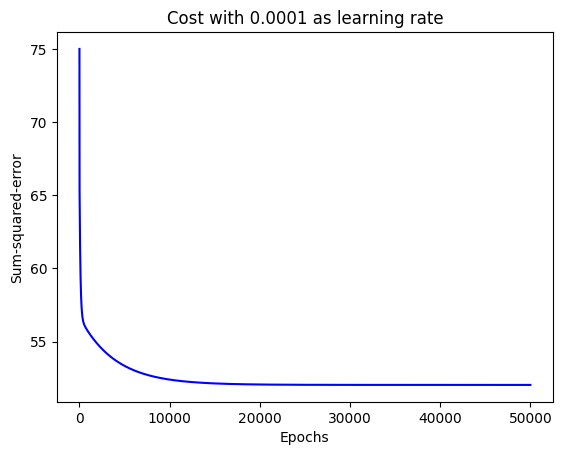

In [60]:
ad = adaline (learning_rate=0.0001, epochs=50000)
ad.fit(x_train, y_train)

plt.plot(range(1, len(ad.cost) + 1), ad.cost, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Cost with 0.0001 as learning rate')
plt.show()

In [61]:
pd.DataFrame(data = ad.ws)

,0
0,2.580977
1,0.028657
2,-1.008002


C:\Users\Asus\AppData\Local\Temp\ipykernel_8636\3061406648.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx],label = cl)


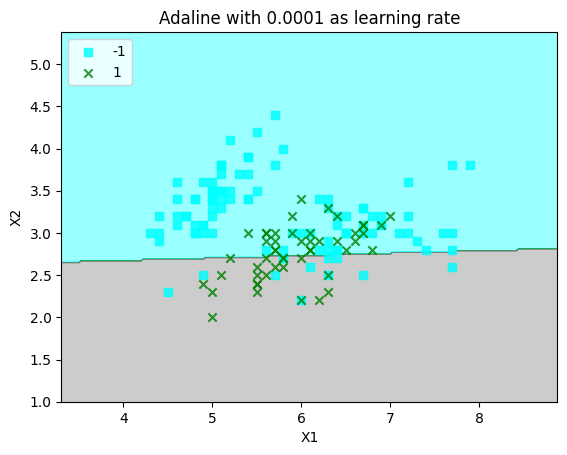

In [62]:
plot_decision_regions(x_train, y_train, classifier = ad)
plt.title('Adaline with 0.0001 as learning rate')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

## **2-2) Madaline**

In [63]:
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(X_moons, Y_moons, test_size=0.5, random_state=3)

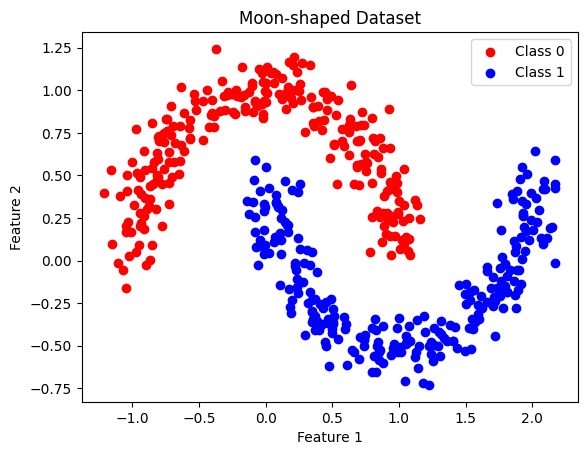

In [64]:
plt.scatter(X_moons[Y_moons == 0][:, 0], X_moons[Y_moons == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_moons[Y_moons == 1][:, 0], X_moons[Y_moons == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()

In [65]:
class madaline ():

    def __init__ (self, num_neorons, learning_rate=0.1, epochs=50):
        
        self.num_n = num_neorons
        self.lr = learning_rate
        self.n_iter = epochs

    def fit (self, X, y):
        
        np.random.seed(40)
        self.weights = np.random.rand(self.num_n, X.shape[1])
        self.bias = np.random.rand(self.num_n, 1)

        self.v = [1] * self.num_n 
        self.vb = self.num_n - 1

        self.cost = []
        count = 0
        
        for i in range (self.n_iter):
            old_weights = copy.deepcopy(self.weights)
            for inp, outp in zip (X, y):

                z = np.matmul(self.weights, np.matrix(inp).T) + self.bias
                az = np.where(z >= 0, 1, -1)

                o = np.dot(np.squeeze(az), np.squeeze(self.v)) + self.vb
                ao = -1
                if o >= 0:
                    ao = 1

                if ao != outp:

                    if outp == 1:
                        z_j = min(abs(z))
                        ind = np.where(abs(z) == z_j)
    
                        self.weights[ind[0][0], :] = self.weights[ind[0][0], :] + self.lr * (1 - z[ind[0][0]]) * np.array(inp)
                        self.bias[ind[0][0]] = self.bias[ind[0][0]] + self.lr * (1 - z[ind[0][0]])
                    else:
                        ind = [i for i, znet in enumerate(z) if znet > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.lr * (-1 - z[indice]) * np.array(inp)
                            self.bias[indice] = self.bias[indice] + self.lr * (-1 - z[indice])

            self.cost.append(self.error(self.predict(X), y))

    def error(self, net, t):
        self.err = ((net-t)**2).sum()/2
        return self.err
    
    def predict(self, X):
        y = []

        for x in X:
            z = np.matmul(self.weights, np.matrix(x).T) + self.bias
            az = np.where(z >= 0, 1, -1)

            o = np.dot(np.squeeze(az), np.squeeze(self.v)) + self.vb
            ao = -1
            if o >= 0:
                ao = 1

            y.append(ao)

        return y

Accuracy of prediction is: 0.908


C:\Users\Asus\AppData\Local\Temp\ipykernel_8636\1808262649.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-md.bias[i] / md.weights[i][1])), slope=-md.weights[i][0] / md.weights[i][1], color="r")


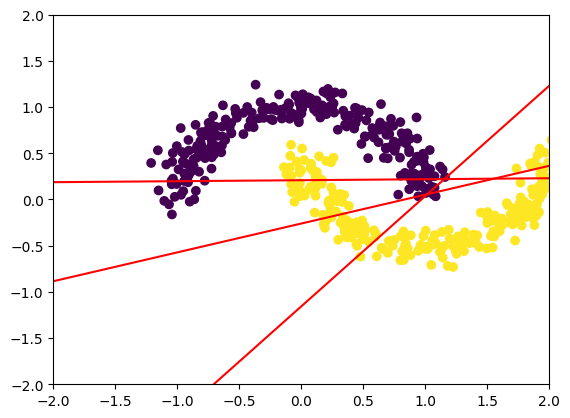

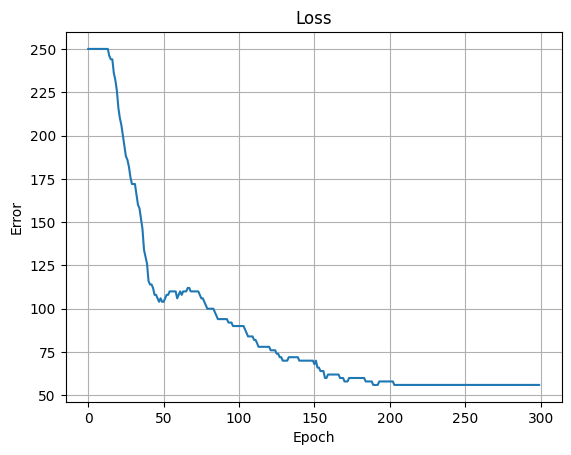

Accuracy of prediction is: 0.888


C:\Users\Asus\AppData\Local\Temp\ipykernel_8636\1808262649.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-md.bias[i] / md.weights[i][1])), slope=-md.weights[i][0] / md.weights[i][1], color="r")


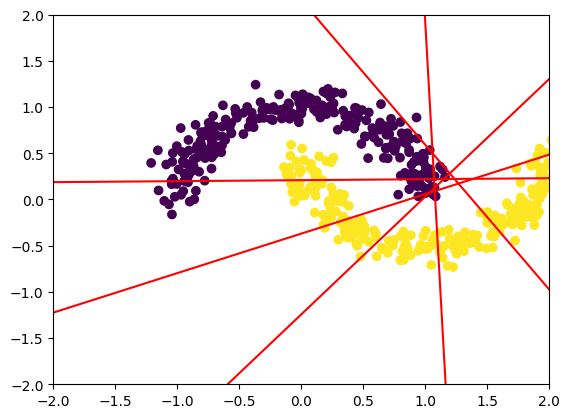

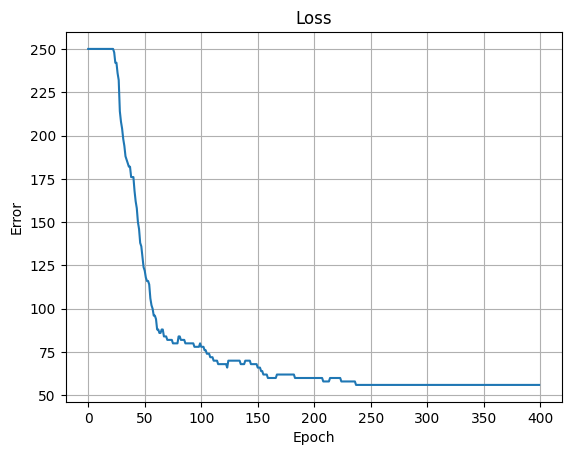

Accuracy of prediction is: 0.884


C:\Users\Asus\AppData\Local\Temp\ipykernel_8636\1808262649.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-md.bias[i] / md.weights[i][1])), slope=-md.weights[i][0] / md.weights[i][1], color="r")


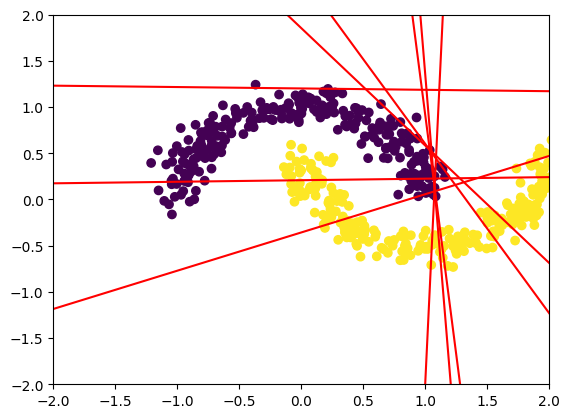

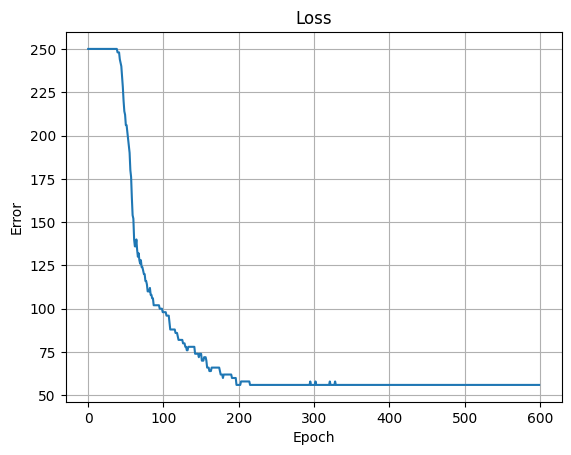

In [66]:
neuron_counts = [3, 5, 8]   
epochs = [300, 400, 600]

Y_train_moons = np.where(Y_train_moons == 1, 1, -1)
Y_test_moons = np.where(Y_test_moons == 1, 1, -1)

for i in range(len(neuron_counts)):

  md = madaline(neuron_counts[i], learning_rate=0.0001, epochs=epochs[i])

  md.fit(X_train_moons, Y_train_moons)

  pred = md.predict(X_test_moons)
  acc = accuracy_score(pred, Y_test_moons)
  print("Accuracy of prediction is:", acc)

  for i in range(neuron_counts[i]):
    plt.axline((0, float(-md.bias[i] / md.weights[i][1])), slope=-md.weights[i][0] / md.weights[i][1], color="r")
  plt.scatter(X_moons[:,0], X_moons[:,1], c=Y_moons.reshape(-1))
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.show()

  plt.plot(md.cost)
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.grid()
  plt.show()